In [6]:
#Imports
import sys; sys.path.insert(0, '..')
import numpy as np
import matplotlib.pyplot as plt
from src import *
from src.config import projectPath
import pickle

In [7]:
def rgksErrorClassification(A, n, normalization, p, trialNumber, sketchType):

    onePassErrors = []
    twoPassErrors = []

    onePassTotalTimes = []
    twoPassTotalTimes = []
    secondPassTimes = []

    kValues = np.arange(1,n-p,1)

    #Run one pass
    for k in kValues:

        trialErrors = []
        trialTotalTimes = []

        for j in range(trialNumber):
            Ahat, secondPassTime, totalTime = timedRGKS(A,int(k),p,sketchType, twoPass=False)
            trialErrors.append(np.linalg.norm(Ahat-A, ord = 2)/normalization)
            trialTotalTimes.append(totalTime)

        onePassErrors.append(np.average(np.array(trialErrors)))
        onePassTotalTimes.append(np.average(np.array(trialTotalTimes)))

    #Run two pass
    for k in kValues:

        trialErrors = []
        trialTotalTimes = []
        trialSecondPassTimes = []

        for j in range(trialNumber):
            Ahat, secondPassTime, totalTime = timedRGKS(A,int(k),p,sketchType, twoPass=True)
            trialErrors.append(np.linalg.norm(Ahat-A, ord = 2)/normalization)
            trialTotalTimes.append(totalTime)
            trialSecondPassTimes.append(secondPassTime)
            
        twoPassErrors.append(np.average(np.array(trialErrors)))
        twoPassTotalTimes.append(np.average(np.array(trialTotalTimes)))
        secondPassTimes.append(np.average(np.array(trialSecondPassTimes)))

    return np.array(onePassErrors), np.array(twoPassErrors), np.array(onePassTotalTimes), np.array(twoPassTotalTimes), np.array(secondPassTimes)

In [8]:
def rsvdErrorClassification(A, n, normalization, p, trialNumber, sketchType):
    
    kValues = np.arange(1,n-p,1)
    rsvdErrors = []
    rsvdTimes = []

    for k in kValues:

        trialErrors = []
        trialTimes = []

        for j in range(trialNumber):
                
            Ahat, trialTime = randomSVD(A, int(k), p, 0, sketchType, True)
            trialErrors.append(np.linalg.norm(Ahat-A, ord = 2)/normalization)
            trialTimes.append(trialTime)

        rsvdErrors.append(np.average(np.array(trialErrors)))
        rsvdTimes.append(np.average(np.array(trialTimes)))

    return np.array(rsvdErrors), np.array(rsvdTimes)

In [9]:
def gksErrorClassification(A, n, normalization, p, trialNumber, sparseSVD = False):

    kValues = np.arange(1,n-p,1)
    gksErrors = []
    gksTimes = []

    for k in kValues:

        trialErrors = []
        trialTimes = []

        for j in range(trialNumber):
                
            Ahat, trialTime = GKS(A, k, True, sparseSVD)
            trialErrors.append(np.linalg.norm(Ahat-A, ord = 2)/normalization)
            trialTimes.append(trialTime)

        gksErrors.append(np.average(np.array(trialErrors)))
        gksTimes.append(np.average(np.array(trialTimes)))

    return np.array(gksErrors), np.array(gksTimes)

In [10]:
#Matrix Parameters
n = 128
rank = 64
p = 10
res = 1e-12
normalization = 1e-12
trialNumber = 20
sketchType = 'Gaussian'

#Generate matrices
rowSpaces = ['hadamard', 'random', 'incoherent', 'coherent']
steepnessValues = {
'steep': 2.75,
'medium': 1,
'smooth': .5
}

In [12]:
matrices = {}

for rowSpace in rowSpaces:
    for steepness in steepnessValues.keys():
        U, sigma, V = getMatrix(n,rank,res,rowSpace,'smooth gap',True, .04, steepnessValues[steepness])
        matrices[rowSpace + steepness] = [U,sigma,V]

In [13]:
#RGKS Results
rgksResults = {}
for rowSpace in rowSpaces:

    for steepness in steepnessValues.keys():

        print (rowSpace + ', ' + steepness)

        U, sigma, V = matrices[rowSpace + steepness]
        A = U@sigma@V.T
        rgksResults[rowSpace + steepness] = rgksErrorClassification(A, n, normalization, p, trialNumber,sketchType)

hadamard, steep
hadamard, medium
hadamard, smooth
random, steep
random, medium
random, smooth
incoherent, steep
incoherent, medium
incoherent, smooth
coherent, steep
coherent, medium
coherent, smooth


In [10]:
#RSVD Results
rsvdResults = {}

for rowSpace in rowSpaces:

    for steepness in steepnessValues.keys():

        print (rowSpace + ', ' + steepness)

        U,sigma,V = matrices[rowSpace + steepness]
        A = U@sigma@V.T
        rsvdResults[rowSpace + steepness] = rsvdErrorClassification(A, n, normalization, p, trialNumber, sketchType)

hadamard, steep
hadamard, medium
hadamard, smooth
random, steep
random, medium
random, smooth
incoherent, steep
incoherent, medium
incoherent, smooth
coherent, steep
coherent, medium
coherent, smooth


In [9]:
#GKS Results
gksResults = {}
sparseSVD = True

for rowSpace in rowSpaces:

    for steepness in steepnessValues.keys():

        print (rowSpace + ', ' + steepness)

        U,sigma,V = matrices[rowSpace + steepness]
        A = U@sigma@V.T
        gksResults[rowSpace + steepness] = gksErrorClassification(A, n, normalization, p, trialNumber, sparseSVD)


hadamard, steep
hadamard, medium


ValueError: expected 1-d or 2-d array or matrix, got array(None, dtype=object)

In [12]:
#Save Data
with open('matrices.pkl', 'wb') as f:
    pickle.dump(matrices, f)

with open('rgksResults.pkl', 'wb') as f:
    pickle.dump(rgksResults, f)

with open('rsvdResults.pkl', 'wb') as f:
    pickle.dump(rsvdResults, f)

with open('gksResults.pkl', 'wb') as f:
    pickle.dump(gksResults, f)

In [3]:
#Load Data
dataFolderPath = projectPath + 'src/data/'

with open(dataFolderPath + 'matrices.pkl', 'rb') as f:
    matrices = pickle.load(f)
with open(dataFolderPath + 'rgksResults.pkl', 'rb') as f:
    rgksResults = pickle.load(f)
with open(dataFolderPath + 'rsvdResults.pkl', 'rb') as f:
    rsvdResults = pickle.load(f)
with open(dataFolderPath + 'gksResults.pkl', 'rb') as f:
    gksResults = pickle.load(f)

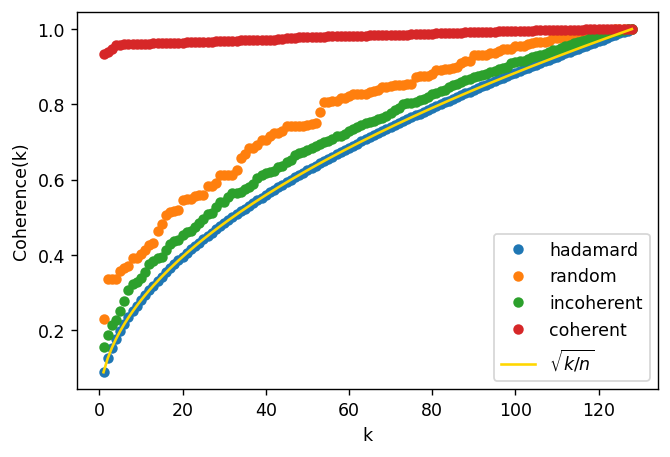

In [11]:
#Plot coherences
fig = plt.figure(dpi=125)

for rowSpace in rowSpaces:

    U,sigma,V = matrices[rowSpace + 'steep']

    kValues2 = np.arange(1,n+1,1)

    coherences = []
    for k in kValues2:
        coherences.append(coherence(V,k))

    plt.plot(kValues2, coherences, 'o', markersize=5, label=rowSpace)

plt.plot(kValues2, np.sqrt(kValues2/n), label=r'$\sqrt{k/n}$', color='gold')
plt.xlabel('k')
plt.ylabel('Coherence(k)')
plt.legend()

Text(0.35, -0.05, 'RGKS Approximation Rank k')

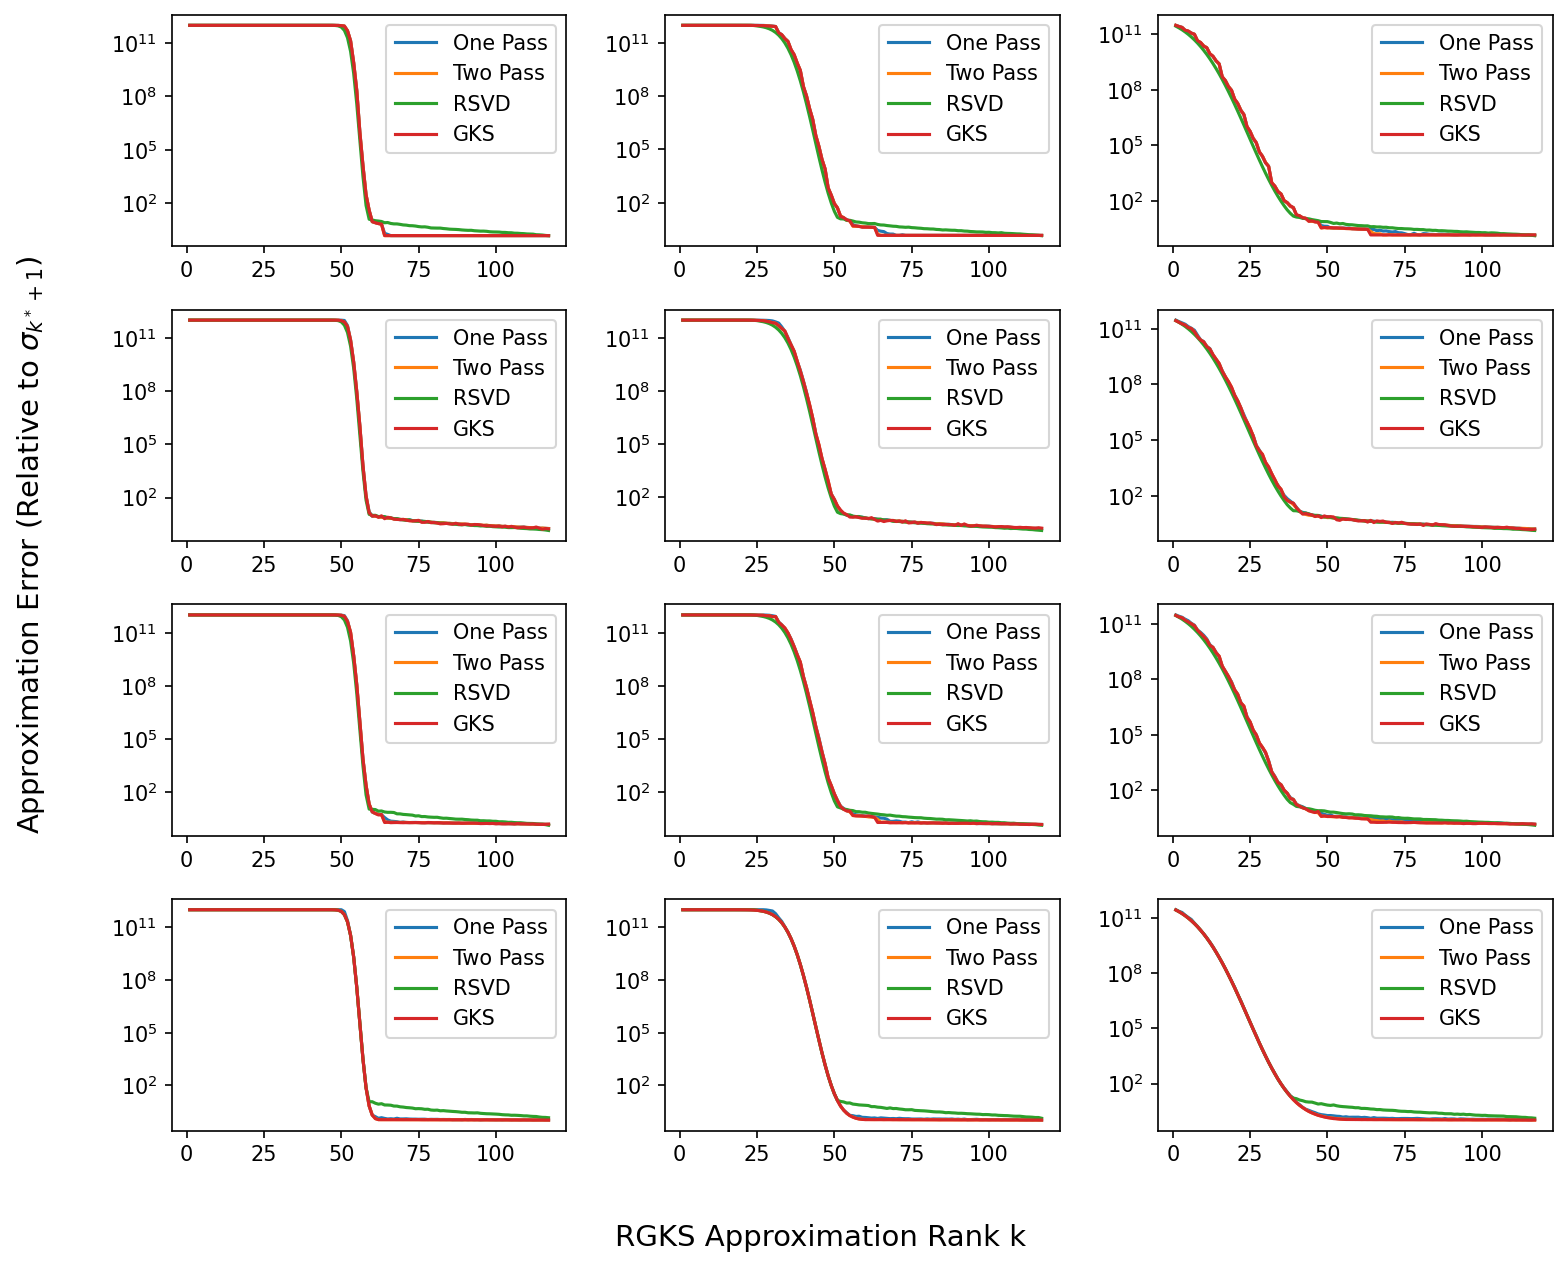

In [12]:
#Approximation Results (k star), Graph All
fig, ax = plt.subplots(4,3, figsize=(10,8), dpi=150)
fig.tight_layout(pad=1)
kValues = np.arange(1,n-p,1)

for i in range(len(rowSpaces)):
    
    for j in range(len(steepnessValues.keys())):

        key = rowSpaces[i] + list(steepnessValues.keys())[j]

        onePassErrors, twoPassErrors, _, _, _ = rgksResults[key]
        rsvdErrors, _ = rsvdResults[key]
        gksErrors, _ = gksResults[key]

        ax[i][j].semilogy(kValues,onePassErrors, label='One Pass')
        ax[i][j].semilogy(kValues,twoPassErrors, label='Two Pass')
        ax[i][j].semilogy(kValues,rsvdErrors, label='RSVD')
        ax[i][j].semilogy(kValues,gksErrors, label='GKS')
        ax[i][j].legend()
        # plt.vlines(x = rank, ymin = 0, ymax = max(twoPassErrors),colors = 'black',
        #         linestyles='dashed', label=r'$k^*$')

fig.text(-.05,.3,r'Approximation Error (Relative to $\sigma_{k^*+1})$', rotation='vertical', size=14)
fig.text(.35,-.05,'RGKS Approximation Rank k', size=14)

Text(1, 0.82, 'Hadamard')

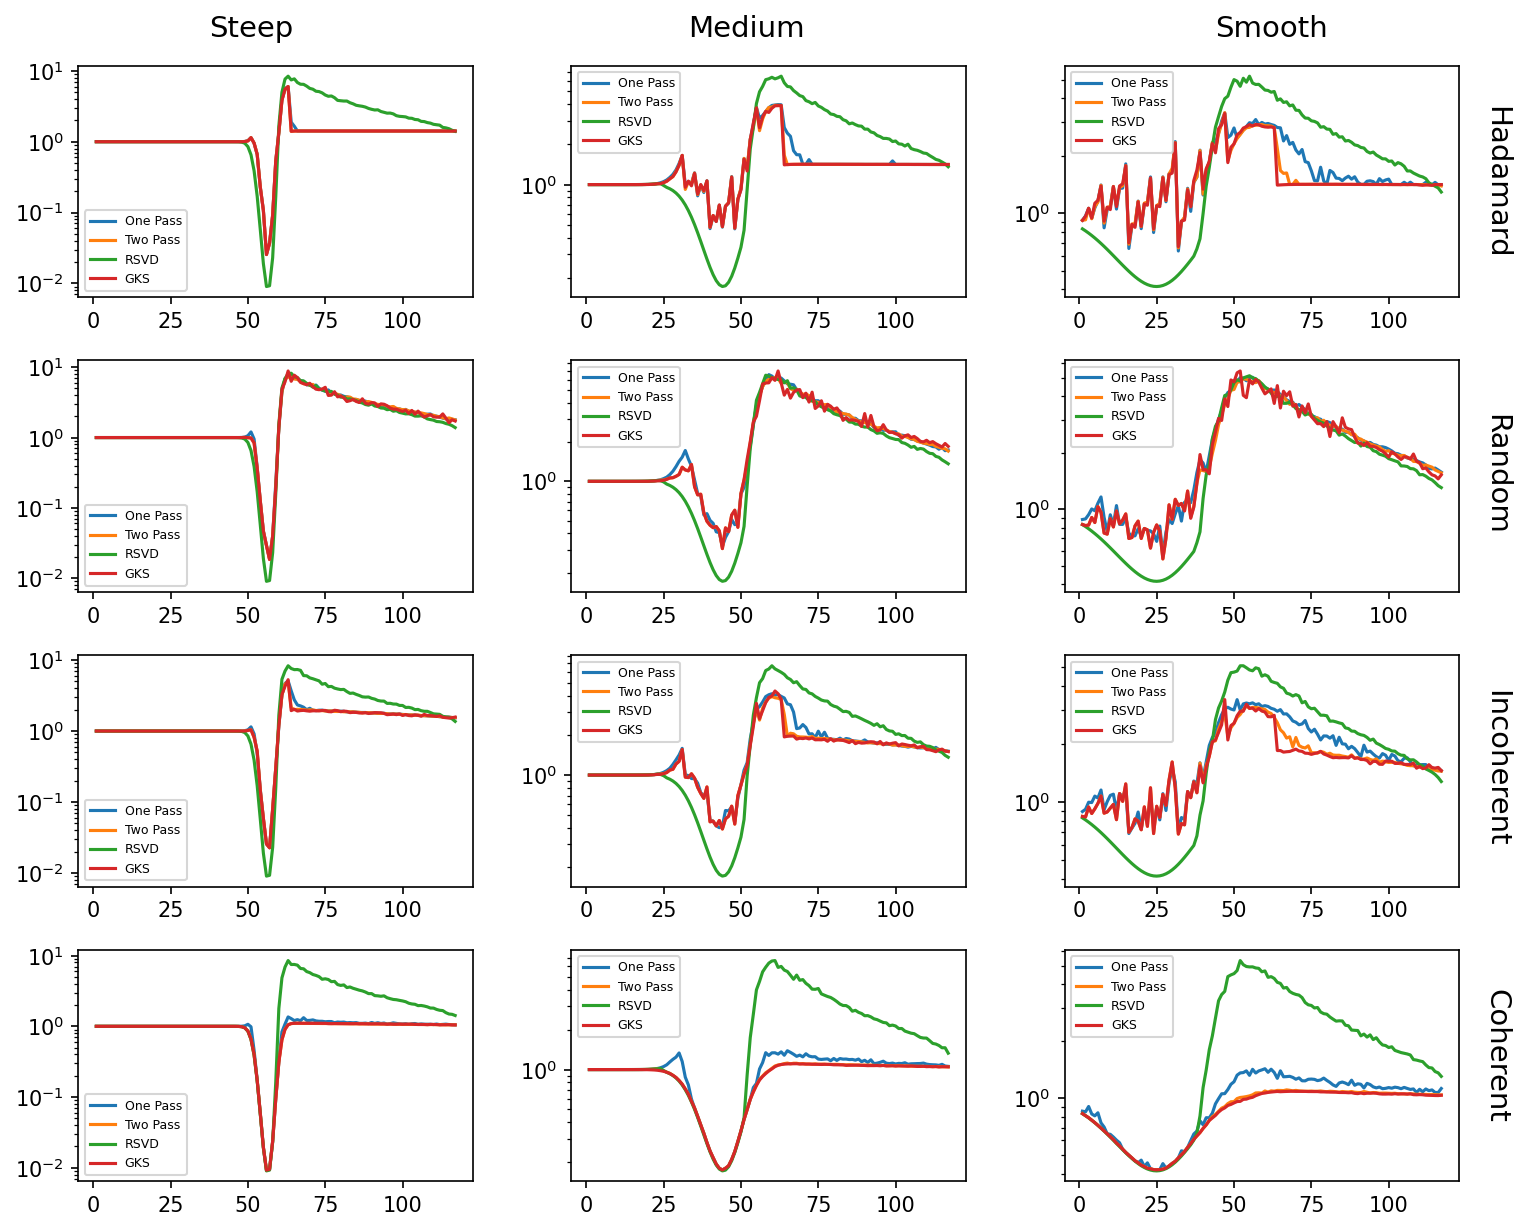

In [9]:
#Approximation Error (k), Graph All
fig, ax = plt.subplots(4,3, figsize=(10,8), dpi=150)
fig.tight_layout(pad=1)
kValues = np.arange(1,n-p,1)

for i in range(len(rowSpaces)):
    
    for j in range(len(steepnessValues.keys())):

        key = rowSpaces[i] + list(steepnessValues.keys())[j]
        # print(str(i) + ', ' + str(j) + ': ' + rowSpaces[i] + ', ' + list(steepnessValues.keys())[j])

        onePassErrors, twoPassErrors, _, _, _ = rgksResults[key]
        rsvdErrors, _ = rsvdResults[key]
        gksErrors, _ = gksResults[key]
        U,sigma,V = matrices[key]

        singVals = np.diag(sigma)
        adjustedOnePassErrors = normalization*onePassErrors/singVals[:n-p-1]
        adjustedTwoPassErrors = normalization*np.array(twoPassErrors)/singVals[:n-p-1]
        adjustedRsvdErrors = normalization*np.array(rsvdErrors)/singVals[:n-p-1]
        adjustedGksErrors = normalization*np.array(gksErrors)/singVals[:n-p-1]

        ax[i][j].semilogy(kValues,adjustedOnePassErrors, label='One Pass')
        ax[i][j].semilogy(kValues,adjustedTwoPassErrors, label='Two Pass')
        ax[i][j].semilogy(kValues,adjustedRsvdErrors, label='RSVD')
        ax[i][j].semilogy(kValues,adjustedGksErrors, label='GKS')
        ax[i][j].legend(prop={'size':6})
        # plt.vlines(x = rank, ymin = 0, ymax = max(twoPassErrors),colors = 'black',
        #         linestyles='dashed', label=r'$k^*$')

textSize = 14

fig.text(.17, 1, 'Steep', ha='center', size = textSize)
fig.text(.5, 1, 'Medium', ha='center', size = textSize)
fig.text(.85, 1, 'Smooth', ha='center', size = textSize)

fig.text(1, .1, 'Coherent', ha='center', size = textSize, rotation = 270, )
fig.text(1, .33, 'Incoherent',ha='center', size = textSize, rotation = 270)
fig.text(1, .59, 'Random',ha='center', size = textSize, rotation = 270)
fig.text(1, .82, 'Hadamard',ha='center', size = textSize, rotation = 270)
# fig.text(-.05,.3,r'Approximation Error (Relative to $\sigma_{k+1})$', rotation=90, size=14)
# fig.text(.35,-.05,'RGKS Approximation Rank k', size=14)

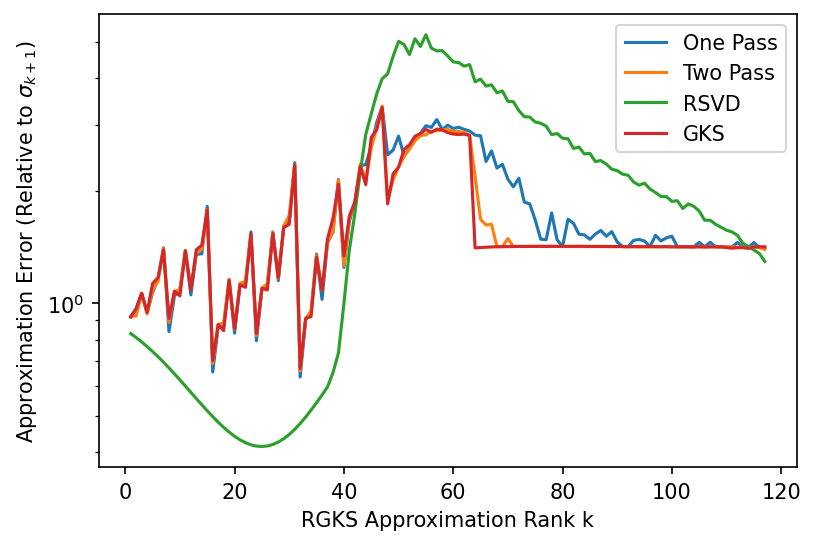

In [18]:
#Approximation Error, Graph One
rowSpace = 'hadamard'
steepness = 'smooth'
kStar = False

fig = plt.figure(dpi = 150)
kValues = np.arange(1,n-p,1)
key = rowSpace + steepness

onePassErrors, twoPassErrors, _, _, _ = rgksResults[key]
rsvdErrors, _ = rsvdResults[key]
gksErrors, _ = gksResults[key]
U,sigma,V = matrices[key]

singVals = np.diag(sigma)
adjustedOnePassErrors = normalization*onePassErrors/singVals[:n-p-1]
adjustedTwoPassErrors = normalization*np.array(twoPassErrors)/singVals[:n-p-1]
adjustedRsvdErrors = normalization*np.array(rsvdErrors)/singVals[:n-p-1]
adjustedGksErrors = normalization*np.array(gksErrors)/singVals[:n-p-1]

if kStar:
    plt.semilogy(kValues,onePassErrors, label='One Pass')
    plt.semilogy(kValues,twoPassErrors, label='Two Pass')
    plt.semilogy(kValues,rsvdErrors, label='RSVD')
    plt.semilogy(kValues,gksErrors, label='GKS')
    plt.ylabel(r'Approximation Error (Relative to $\sigma_{k^*+1})$')

else:
    plt.semilogy(kValues,adjustedOnePassErrors, label='One Pass')
    plt.semilogy(kValues,adjustedTwoPassErrors, label='Two Pass')
    plt.semilogy(kValues,adjustedRsvdErrors, label='RSVD')
    plt.semilogy(kValues,adjustedGksErrors, label='GKS')
    plt.ylabel(r'Approximation Error (Relative to $\sigma_{k+1})$')

plt.xlabel('RGKS Approximation Rank k')
plt.legend()

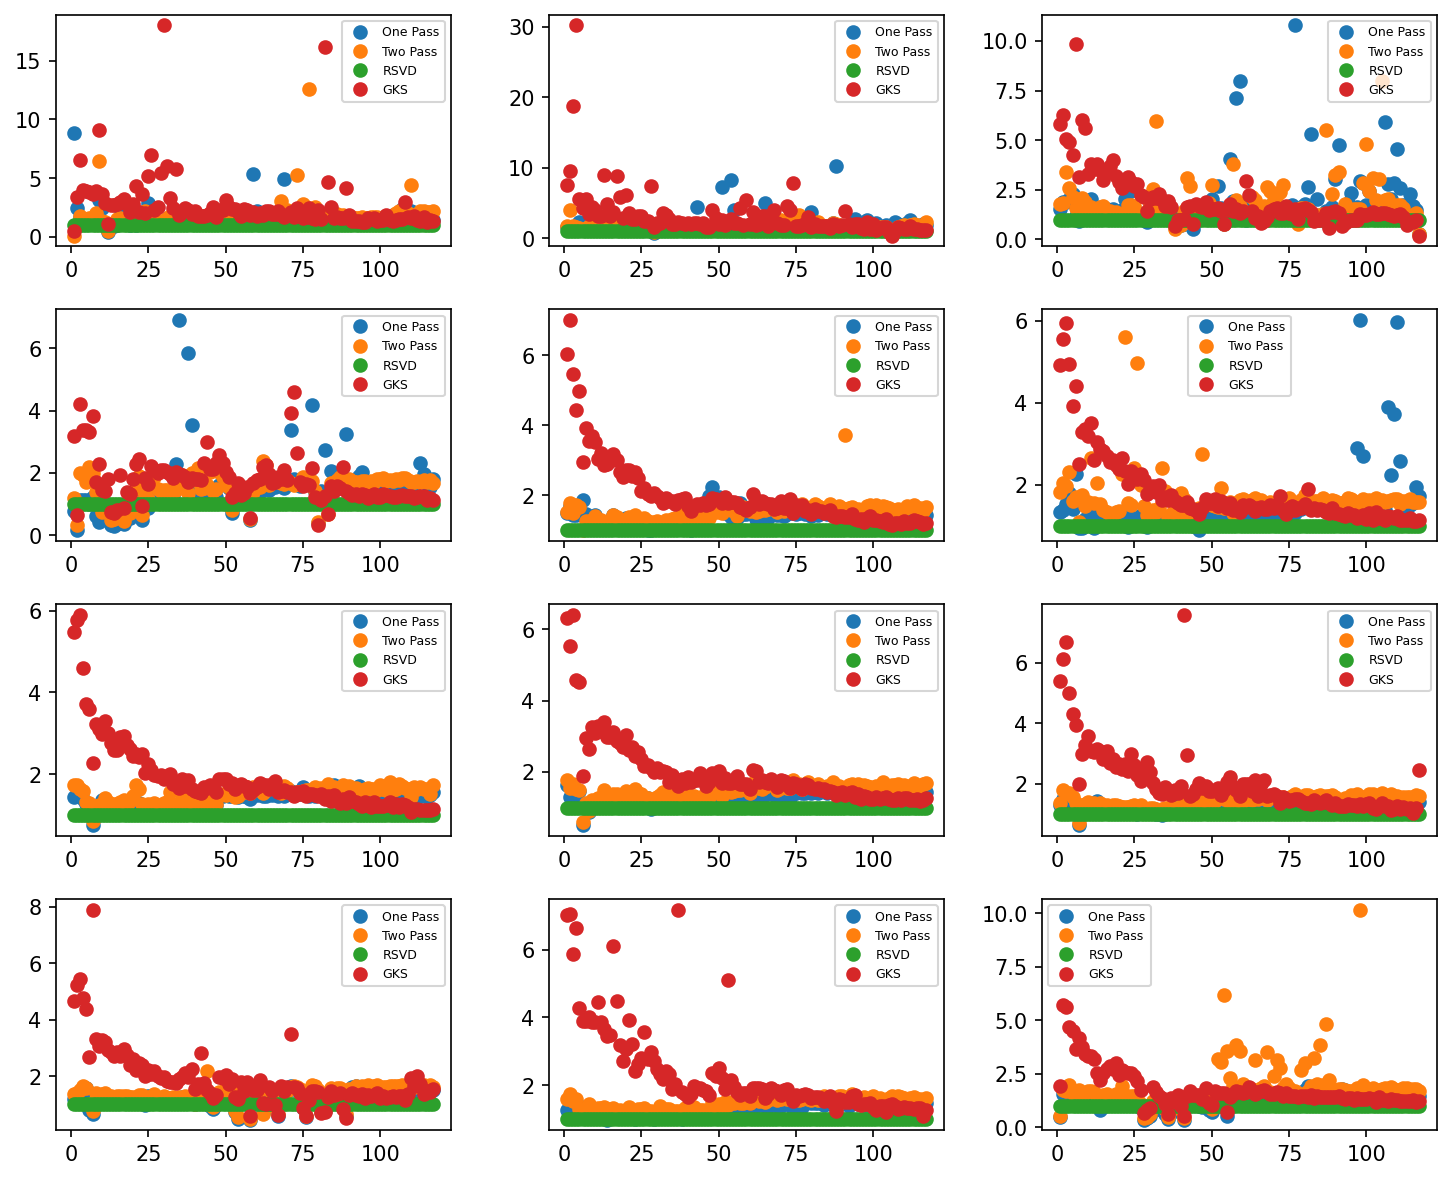

In [91]:
#Time, Graph All
fig, ax = plt.subplots(4,3, figsize=(10,8), dpi=150)
fig.tight_layout(pad=1)
kValues = np.arange(1,n-p,1)

pointType = 'o'

for i in range(len(rowSpaces)):
    for j in range(len(steepnessValues.keys())):
        key = rowSpaces[i] + list(steepnessValues)[j]

        _, _ , onePassTimes, twoPassTimes, extraStepTimes = rgksResults[key]
        _, rsvdTimes = rsvdResults[key]
        _, gksTimes = gksResults[key]
        ax[i][j].plot(kValues, onePassTimes/rsvdTimes, pointType, label = 'One Pass')
        ax[i][j].plot(kValues, twoPassTimes/rsvdTimes, pointType, label = 'Two Pass')
        ax[i][j].plot(kValues, rsvdTimes/rsvdTimes, pointType, label = 'RSVD')
        ax[i][j].plot(kValues, gksTimes/rsvdTimes, pointType, label = 'GKS')
        ax[i][j].legend(prop={'size': 6})

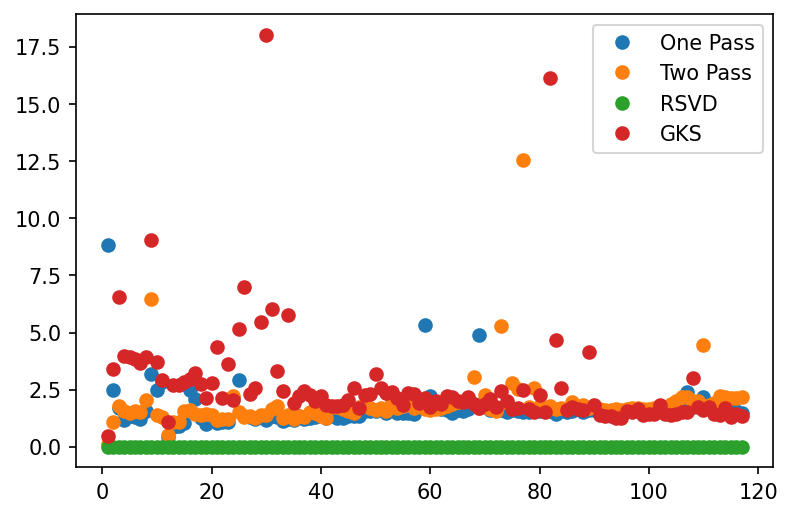

In [95]:
#Time, Graph One
rowSpace = 'hadamard'
steepness = 'steep'
pointType = 'o'

fig = plt.figure(dpi = 150)
kValues = np.arange(1,n-p,1)
key = rowSpace + steepness

_, _ , onePassTimes, twoPassTimes, extraStepTimes = rgksResults[key]
_, rsvdTimes = rsvdResults[key]
_, gksTimes = gksResults[key]

plt.plot(kValues, onePassTimes/rsvdTimes, pointType, label = 'One Pass')
plt.plot(kValues, twoPassTimes/rsvdTimes, pointType, label = 'Two Pass')
plt.plot(kValues, rsvdTimes, pointType, label = 'RSVD')
plt.plot(kValues, gksTimes/rsvdTimes, pointType, label = 'GKS')
plt.legend()